## Import librarys and settings

In [1]:
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
import plotly.plotly as py  
import plotly.tools as tls   
import plotly.graph_objs as go
#%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Function to make animation

## Bring in APSIM Data

In [6]:
con = sqlite3.connect('C:\ApsimX\Prototypes\MultiPoreWater/ReportDetail.db')

In [7]:
APSIMData = pd.read_sql("Select * from Report,Simulations where Report.SimulationID = Simulations.ID",con, index_col = ['TimeStep','Date','Process','Hour','Layer'])
APSIMData = APSIMData.drop(labels = ['SimulationID', 'ZoneName','ID'],axis=1)
PoreWater = APSIMData.ix[:,[X for X in APSIMData.columns if 'PW' in X]]
OtherData = APSIMData.ix[:,[X for X in APSIMData.columns if 'PW' not in X]]
LayerNum = 7
PoreComNum = 7
LayerIndices = []
for i in range(1,LayerNum +1):
    LayerIndices.append('L'+str(i))
CompartmentIndices = []
for i in range(1,PoreComNum +1):
    CompartmentIndices.append('C'+str(i))    
PoreColumnIndex = pd.MultiIndex.from_product([LayerIndices,CompartmentIndices],names=['Layer','PoreComponent'])
PoreWater.columns = PoreColumnIndex

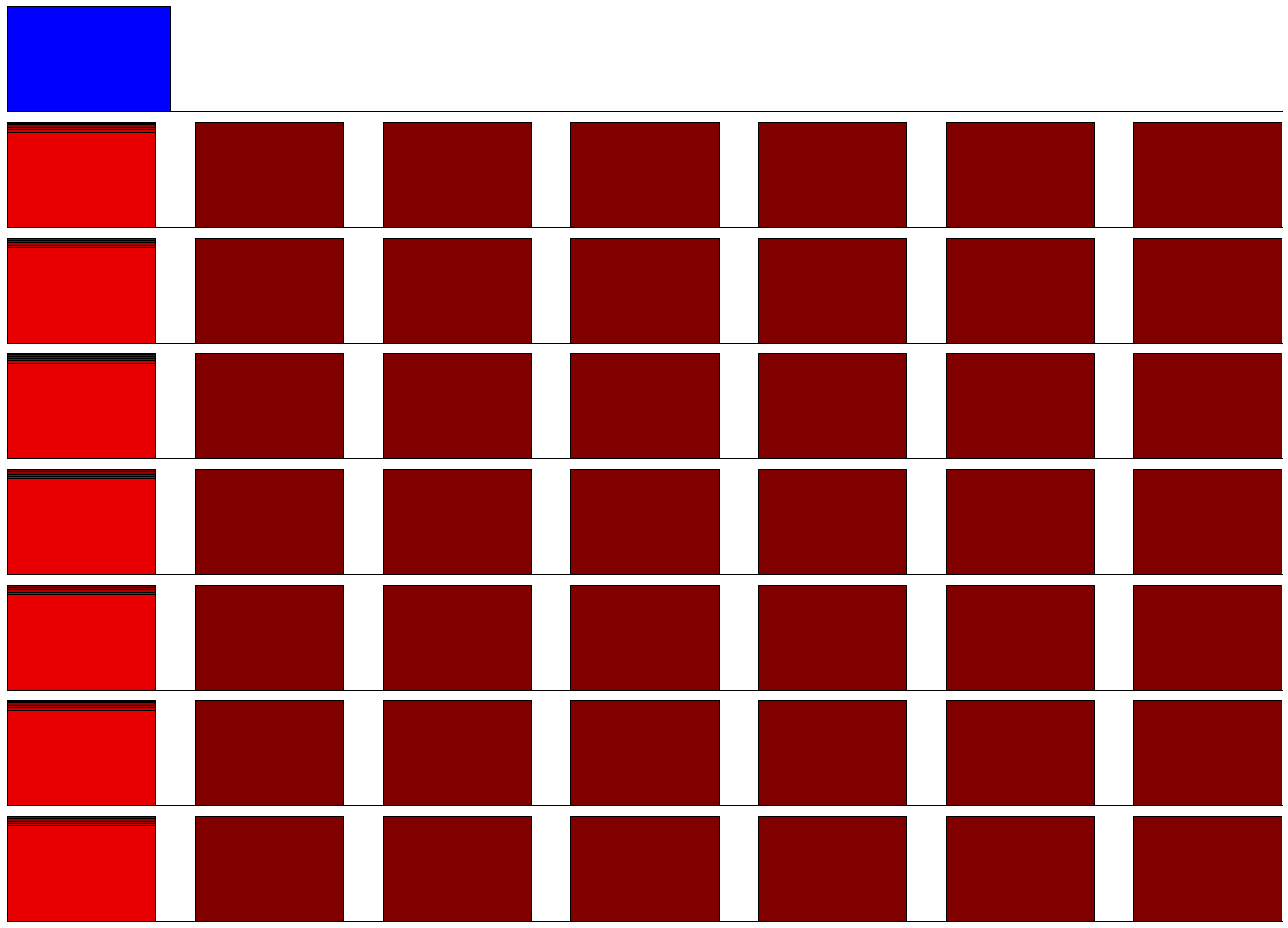

In [45]:
import matplotlib.animation as manimation

axes = []
for ax in range(1,LayerNum+2):
    axes.append('ax'+str(ax))
fig, axes = plt.subplots(figsize = (18,13),nrows=LayerNum+1, ncols=1,sharex=True,sharey=True)
for ax in axes:
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.tick_params(color='none')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

    for t in range(100):
        CurLay = 0;
        for ax in axes:
            if CurLay == 0:
                ax.bar([0],[1],0.87)
                CurLay +=1
            else:
                height = PoreWater.ix[t+1,'L'+str(l-1)].values[0]
                cols = []
                for c in range(1,PoreComNum+1):
                    cols.append(scalarMap.to_rgba(PoreWater.ix[t+1,'L'+str(l-1)].ix[:,'C'+str(c)].values[0]))
                ax.bar(left,height,width=0.79,color=cols)
        writer.grab_frame()

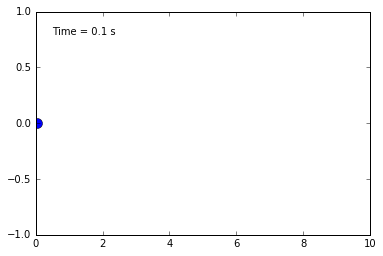

In [5]:
"""
This short code snippet utilizes the new animation package in
matplotlib 1.1.0; it's the shortest snippet that I know of that can
produce an animated plot in python. I'm still hoping that the
animate package's syntax can be simplified further. 
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
def simData():
# this function is called as the argument for
# the simPoints function. This function contains
# (or defines) and iterator---a device that computes
# a value, passes it back to the main program, and then
# returns to exactly where it left off in the function upon the
# next call. I believe that one has to use this method to animate
# a function using the matplotlib animation package.
#
    t_max = 10.0
    dt = 0.05
    x = 0.0
    t = 0.0
    while t < t_max:
        x = np.sin(np.pi*t)
        t = t + dt
        yield x, t
 
def simPoints(simData):
    x, t = simData[0], simData[1]
    time_text.set_text(time_template%(t))
    line.set_data(t, x)
    return line, time_text
 
##
##   set up figure for plotting:
##
fig = plt.figure()
ax = fig.add_subplot(111)
# I'm still unfamiliar with the following line of code:
line, = ax.plot([], [], 'bo', ms=10)
ax.set_ylim(-1, 1)
ax.set_xlim(0, 10)
##
time_template = 'Time = %.1f s'    # prints running simulation time
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
## Now call the animation package: (simData is the user function
## serving as the argument for simPoints):
ani = animation.FuncAnimation(fig, simPoints, simData, blit=False,\
     interval=10, repeat=True)
plt.show()